<a href="https://colab.research.google.com/github/Zerol-91/Stress-Level-ML-Researching/blob/main/noteboks/categorization_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is this notebook about
This notebook stands for experiment with prediction stress levels as classes of categorizational model

## Get dataset

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/Anxiety_Level_Test_2.csv")

In [51]:
new_column_names = {
    'Отметка времени': 'Timestamp',
    'По Вашему *субъективному мнению*, как Вы оцените свой уровень тревожности от 1 до 10 баллов': 'Subjective_Anxiety',
    'За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?': 'Nervous_Freq',
    'За последние 2 недели, как часто Вы не могли остановить или контролировать беспокойство?': 'Worry_Control_Freq',
    'За последние 2 недели, как часто Вы чрезмерно беспокоились по разным поводам?': 'Excessive_Worry_Freq',
    'За последние 2 недели, как часто Вам было трудно расслабиться?': 'Relax_Difficulty_Freq',
    'За последние 2 недели, как часто Вы были настолько беспокойны, что Вам было трудно сидеть на месте?': 'Restlessness_Freq',
    'За последние 2 недели, как часто Вы были раздражительны?': 'Irritability_Freq',
    'За последние 2 недели, как часто Вы испытывали страх, будто может случиться что-то плохое?': 'Fear_Bad_Happening_Freq',
    'Сколько часов сна Вы в среднем получаете за ночь (последняя неделя)?': 'Sleep_Hours',
    'Сколько раз в неделю Вы занимаетесь спортом (30 минут и более)?': 'Sport_Freq',
    'Сколько минут в среднем в день Вы уделяете физическим нагрузкам (любым)?': 'Physical_Activity_Minutes',
    'Принимаете ли Вы сейчас лекарства от тревоги/депрессии или другое психотропное лечение?': 'Taking_Medication',
    'Как часто Вы выходите на прогулку/на свежий воздух?': 'Outdoor_Walks_Freq',
    'Насколько Вы удовлетворены уровнем вашего общения с друзьями, коллегами и знакомыми?': 'Social_Satisfaction',
    'Насколько Вы удовлетворены собственной текущей рабочей/учебной средой (коллеги, учебный коллектив, условия)?': 'Work_Study_Satisfaction',
    'Какой режим Вам больше подходит?': 'Circadian_Rhythm',
    'Насколько Вы чувствуете поддержку со стороны близких (друзей/семьи)?': 'Family_Friends_Support',
    'Сколько часов в среднем в день вы проводите в телефоне (не считая работы/учёбы)?': 'Phone_Hours',
    'Произошло ли в вашей жизни за последний год значимое негативное событие (потеря работы, развод, смерть близкого, серьёзная болезнь и т.п.)?': 'Negative_Event_Last_Year',
    'Ваш пол': 'Gender',
    'Ваш возраст (лет)': 'Age',
    'Физическая активность/Занятие спортом (в среднем часов за неделю)': 'Sport_Hours_Weekly',
    'Как часто Вы употребляете алкоголь?': 'Alcohol_Freq',
    'Как Вы опишете свой статус курения?': 'Smoking_Status',
    'Качество вашего питания (самооценка)': 'Diet_Quality',
    'Сколько раз Вы посещали психолога/психотерапевта за последний месяц?': 'Therapist_Visits_Last_Month'
}

dataset.rename(columns=new_column_names, inplace=True)
dataset.columns

Index(['Timestamp', 'Subjective_Anxiety', 'Nervous_Freq', 'Worry_Control_Freq',
       'Excessive_Worry_Freq', 'Relax_Difficulty_Freq', 'Restlessness_Freq',
       'Irritability_Freq', 'Fear_Bad_Happening_Freq', 'Sleep_Hours',
       'Sport_Hours_Weekly', 'Alcohol_Freq', 'Smoking_Status', 'Diet_Quality',
       'Therapist_Visits_Last_Month', 'Taking_Medication',
       'Outdoor_Walks_Freq', 'Social_Satisfaction', 'Work_Study_Satisfaction',
       'Circadian_Rhythm', 'Family_Friends_Support', 'Phone_Hours',
       'Negative_Event_Last_Year', 'Gender', 'Age'],
      dtype='object')

## Feature encoding

As we used public google forms to get dataset we need to encode results

> На будущее: создай отдельный ноутбук с этим кодом. Назови его пропроцессинг и залей. Нечего каждый ноуьбук захламлять



In [52]:
def encode_frequency_columns_GAD7(df, columns_to_encode):
    """
    Encodes frequency columns (GAD-7) with Russian text values to numerical values.

    Args:
        df: pandas DataFrame.
        columns_to_encode: List of column names to encode.

    Returns:
        pandas DataFrame with encoded columns.
    """
    encoding_map = {'Ни разу': 0, 'Несколько дней': 1, 'Более половины дней': 2, 'Почти каждый день': 3}
    for col in columns_to_encode:
        if col in df.columns:
            df[col] = df[col].replace(encoding_map)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return df

# List of frequency columns to encode
frequency_columns = [
    'Nervous_Freq',
    'Worry_Control_Freq',
    'Excessive_Worry_Freq',
    'Relax_Difficulty_Freq',
    'Restlessness_Freq',
    'Irritability_Freq',
    'Fear_Bad_Happening_Freq'
]

# Apply the encoding function
dataset = encode_frequency_columns_GAD7(dataset, frequency_columns)

dataset.head(2)

/tmp/ipython-input-3817813000.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(encoding_map)


,Timestamp,Subjective_Anxiety,Nervous_Freq,Worry_Control_Freq,Excessive_Worry_Freq,Relax_Difficulty_Freq,Restlessness_Freq,Irritability_Freq,Fear_Bad_Happening_Freq,Sleep_Hours,...,Taking_Medication,Outdoor_Walks_Freq,Social_Satisfaction,Work_Study_Satisfaction,Circadian_Rhythm,Family_Friends_Support,Phone_Hours,Negative_Event_Last_Year,Gender,Age
0,06.10.2025 18:07:59,2,0,1,0,3,1,1,0,7.5,...,Нет,Раз в неделю,Полностью удовлетворён(а),Полностью удовлетворён(а),Жаворонок — мне удобнее вставать рано и ложить...,Всегда,4.0,Нет,Мужской,18.0
1,06.10.2025 18:11:32,7,2,1,1,3,2,2,0,4.0,...,Нет,Не более 3 раз в месяц,Полностью удовлетворён(а),Скорее удовлетворён(а),Сова — мне удобнее ложиться поздно и вставать ...,Всегда,4.0,Нет,Мужской,19.0


In [60]:
def encode_categorical_columns_notGAD7(df, encoding_dict):
    """
    Encodes categorical columns with Russian text values to numerical values using a provided dictionary.

    Args:
        df: pandas DataFrame.
        encoding_dict: Dictionary with column names as keys and mapping dictionaries as values.

    Returns:
        pandas DataFrame with encoded columns.
    """
    for col, mapping in encoding_dict.items():
        if col in df.columns:
            df[col] = df[col].replace(mapping)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return df

# Dictionary with encoding mappings for different columns
encoding_dict = {
    'Taking_Medication': {'Нет': 0, 'Да': 1},
    'Negative_Event_Last_Year': {'Нет': 0, 'Да': 1},
    'Outdoor_Walks_Freq': {
        'Никогда': 0,
        'Не более 3 раз в месяц': 1,
        'Раз в неделю': 2,
        'Несколько раз в неделю': 3,
        'Почти каждый день': 4
    },
    'Social_Satisfaction': {
        'Совершенно не удовлетворён(а)': 0,
        'Скорее не удовлетворён(а)': 1,
        'Нейтрально': 2,
        'Скорее удовлетворён(а)': 3,
        'Полностью удовлетворён(а)': 4
    },
    'Work_Study_Satisfaction': {
        'Совершенно не удовлетворён(а)': 0,
        'Скорее не удовлетворён(а)': 1,
        'Нейтрально': 2,
        'Скорее удовлетворён(а)': 3,
        'Полностью удовлетворён(а)': 4
    },
    'Circadian_Rhythm': {
        'Жаворонок — мне удобнее вставать рано и ложиться рано': 0,
        'Нейтрально — нет яркого предпочтения': 1,
        'Сова — мне удобнее ложиться поздно и вставать поздно': 2
    },
    'Family_Friends_Support': {
        'Никогда': 0,
        'Редко': 1,
        'Иногда': 2,
        'Часто': 3,
        'Всегда': 4
    },
    'Alcohol_Freq': {
        'Никогда':0,
        'Реже одного раза в месяц':1,
        '1-3 раза в месяц':2,'1-2 раза в неделю':3,
        '3-4 раза в неделю':4,'Почти ежедневно':5
    },
    'Smoking_Status' : {
        'Не курю':0,
        'Иногда курю':1,
        'Ежедневно курю':2
    },
    'Therapist_Visits_Last_Month':
    {
        '0': 0,
        '1': 1,
        '2': 2,
        '3 и больше':3
    },
    'Gender': {
        'Мужской': 0,
        'Предпочитаю не говорить': 0.5,
        'Женский': 1
    }
}

# Apply the encoding function
dataset = encode_categorical_columns_notGAD7(dataset, encoding_dict)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    439 non-null    object 
 1   Subjective_Anxiety           439 non-null    int64  
 2   Nervous_Freq                 439 non-null    int64  
 3   Worry_Control_Freq           439 non-null    int64  
 4   Excessive_Worry_Freq         439 non-null    int64  
 5   Relax_Difficulty_Freq        439 non-null    int64  
 6   Restlessness_Freq            439 non-null    int64  
 7   Irritability_Freq            439 non-null    int64  
 8   Fear_Bad_Happening_Freq      439 non-null    int64  
 9   Sleep_Hours                  439 non-null    float64
 10  Sport_Hours_Weekly           439 non-null    float64
 11  Alcohol_Freq                 439 non-null    int64  
 12  Smoking_Status               439 non-null    int64  
 13  Diet_Quality        

/tmp/ipython-input-1655294544.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


## GAD7 integration

We used GAD7 in our form to get stress SCORE. Lets get it

In [54]:
dataset['Anxiety_Level'] = dataset[['Nervous_Freq',
                                    'Worry_Control_Freq',
                                    'Excessive_Worry_Freq',
                                    'Relax_Difficulty_Freq',
                                    'Restlessness_Freq',
                                    'Irritability_Freq',
                                    'Fear_Bad_Happening_Freq']].sum(axis=1)

<Axes: xlabel='Anxiety_Level', ylabel='Density'>

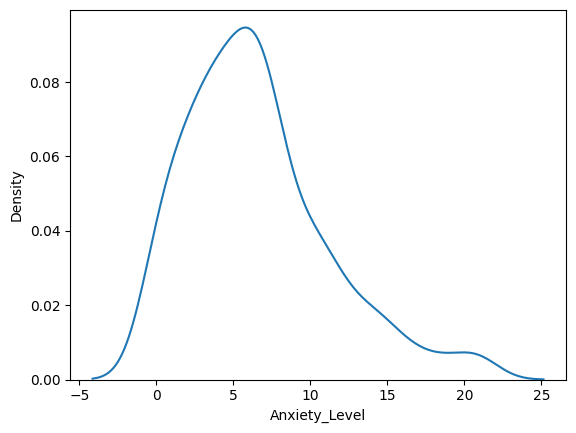

In [55]:
sns.kdeplot(dataset['Anxiety_Level'])

## Create train-test split

## Train classic categorization model (Random Forest)